In [166]:
import sys
import os
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
if project_root not in sys.path:
    sys.path.append(project_root)

In [167]:
from Data.DatabaseConnection import DatabaseConnection
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [168]:
dotenv_path = os.path.abspath("../.env")  
db = DatabaseConnection(dotenv_path)

In [169]:
Items = db.query("SELECT items.* from items join matches on items.match_id = matches.match_id WHERE matches.tft_set_number = 14")
Players = db.get_all_players()

In [170]:
items_df = pd.DataFrame(Items, columns=['id','match_id', 'puuid', 'character_id', 'item_id'])
PLayers_df = pd.DataFrame(Players, columns=['puuid', 'match_id', 'placement', 'level', 'gold_left', 'last_round', 'players_eilimnated','time_eliminated','total_damage','companion_id', 'tier', 'division','leaguepoints','wins', 'losses'])

In [171]:
items_df = items_df[items_df["match_id"] != 'EUN1_3784287010' ]
items_df = items_df[items_df["match_id"] != 'EUN1_3785454165' ]
items_df = items_df[items_df["match_id"] != 'EUN1_3785134625' ]
items_df = items_df[items_df["match_id"] != 'EUN1_3784302684' ]
items_df = items_df[items_df["match_id"] != 'EUN1_3785360005' ]

In [172]:
unique_items = pd.read_csv('../Notebooks/unique_items.csv')

In [173]:
print(unique_items)

                                 item_id item_pool       type    damage
0             TFT_Item_GuinsoosRageblade   default  offensive  physical
1             TFT_Item_MadredsBloodrazor   default  offensive    hybrid
2        TFT14_Item_ControllerEmblemItem    emblem        NaN       NaN
3                   TFT_Item_BrambleVest   default  defensive       NaN
4                   TFT_Item_DragonsClaw   default  defensive       NaN
..                                   ...       ...        ...       ...
140  TFT_Item_Artifact_InnervatingLocket  artifact  defensive       NaN
141                     TFT_Item_Chalice  artifact    utility       NaN
142      TFT5_Item_MorellonomiconRadiant   radiant  offensive   magical
143      TFT5_Item_NightHarvesterRadiant   radiant  defensive       NaN
144    TFT_Item_Artifact_SpectralCutlass  artifact  offensive  physical

[145 rows x 4 columns]


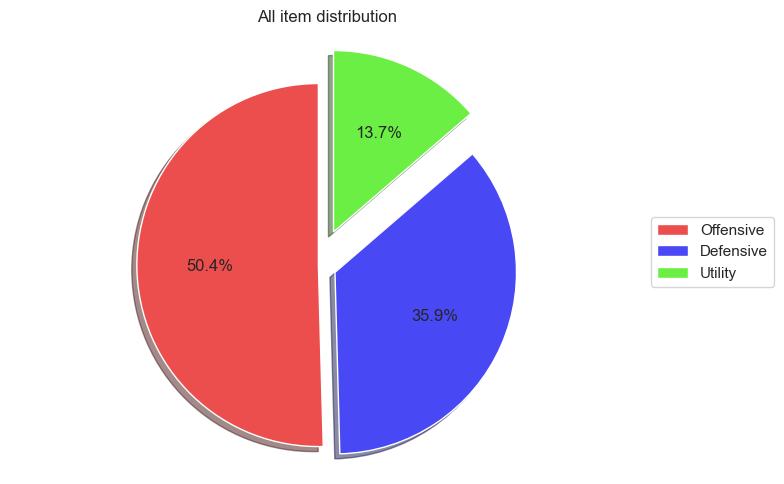

In [174]:
counts = unique_items["type"].value_counts()
labels = ['Offensive', 'Defensive','Utility']

plt.figure(figsize=(8, 5))
plt.pie(
    counts,
    autopct='%1.1f%%',
    explode=(0.0,0.1,0.2),
    startangle=90,
    textprops={'fontsize': 12},
    colors=("#ec4e4e", "#4848f5", "#6cef44"), 
    shadow=True, 
)
plt.title('All item distribution')
plt.legend(labels, loc='center left', bbox_to_anchor=(1, 0.5))
plt.axis('equal') 
plt.tight_layout() 
plt.show()

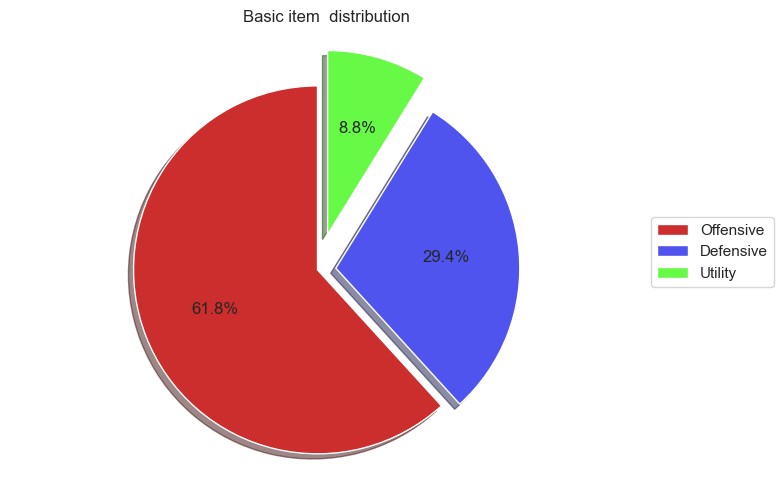

In [175]:
counts_default = unique_items[unique_items["item_pool"] == "default"]["type"].value_counts()
labels = ['Offensive', 'Defensive','Utility']

plt.figure(figsize=(8, 5))
plt.pie(
    counts_default,
    autopct='%1.1f%%',
    explode=(0.0,0.1,0.2),
    startangle=90,
    textprops={'fontsize': 12},
    colors=("#cc2e2e", "#4f54ef", "#66f945"), 
    shadow=True, 
)
plt.title('Basic item  distribution')
plt.legend(labels, loc='center left', bbox_to_anchor=(1, 0.5))
plt.axis('equal') 
plt.tight_layout() 
plt.show()

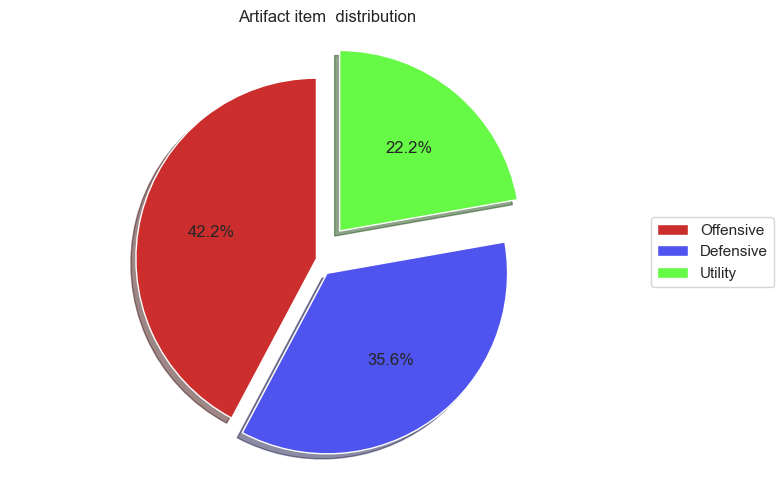

In [176]:
counts_artifacts = unique_items[unique_items["item_pool"] == "artifact"]["type"].value_counts()
labels = ['Offensive', 'Defensive','Utility']

plt.figure(figsize=(8, 5))
plt.pie(
    counts_artifacts,
    autopct='%1.1f%%',
    explode=(0.0,0.1,0.2),
    startangle=90,
    textprops={'fontsize': 12},
    colors=("#cc2e2e", "#4f54ef", "#66f945"), 
    shadow=True, 
)
plt.title('Artifact item  distribution')
plt.legend(labels, loc='center left', bbox_to_anchor=(1, 0.5))
plt.axis('equal') 
plt.tight_layout() 
plt.show()

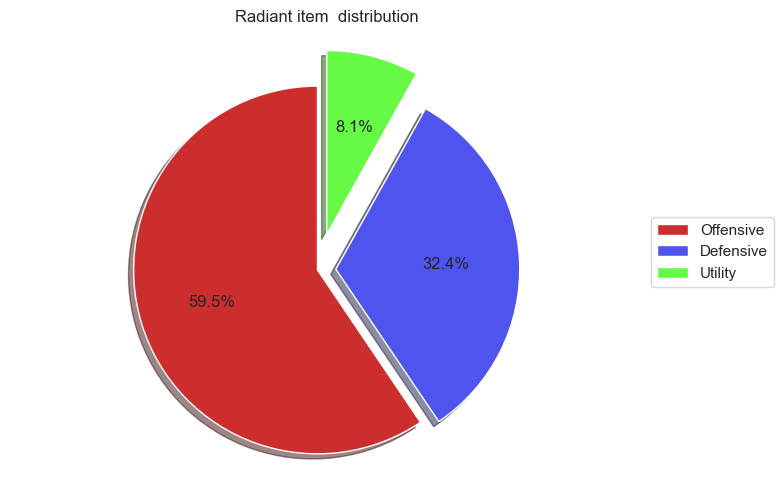

In [177]:
counts_radiant = unique_items[unique_items["item_pool"] == "radiant"]["type"].value_counts()
labels = ['Offensive', 'Defensive','Utility']

plt.figure(figsize=(8, 5))
plt.pie(
    counts_radiant,
    autopct='%1.1f%%',
    explode=(0.0,0.1,0.2),
    startangle=90,
    textprops={'fontsize': 12},
    colors=("#cc2e2e", "#4f54ef", "#66f945"), 
    shadow=True, 
)
plt.title('Radiant item  distribution')
plt.legend(labels, loc='center left', bbox_to_anchor=(1, 0.5))
plt.axis('equal') 
plt.tight_layout() 
plt.show()

In [178]:
counts_dmg_type = unique_items[unique_items["type"] == "offensive"]["damage"].value_counts()
print(counts_dmg_type)

damage
magical     25
physical    22
hybrid      12
Name: count, dtype: int64


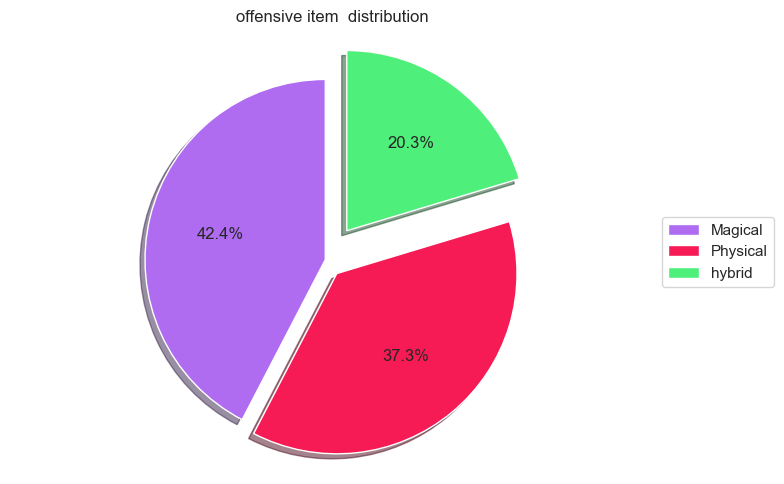

In [179]:
counts_dmg_type = unique_items[unique_items["type"] == "offensive"]["damage"].value_counts()
labels = ['Magical', 'Physical','hybrid']

plt.figure(figsize=(8, 5))
plt.pie(
    counts_dmg_type,
    autopct='%1.1f%%',
    explode=(0.0,0.1, 0.2),
    startangle=90,
    textprops={'fontsize': 12},
    colors=("#b06cf0", "#f61b55", "#4fef7c"), 
    shadow=True, 
)
plt.title('offensive item  distribution')
plt.legend(labels, loc='center left', bbox_to_anchor=(1, 0.5))
plt.axis('equal') 
plt.tight_layout() 
plt.show()

In [180]:

items_placements = db.query("SELECT items.match_id, items.puuid, items.item_id, items.character_id,placement FROM items join players on items.puuid = players.puuid")

In [181]:
items_placements_df = pd.DataFrame(items_placements, columns=['match_id', 'puuid', 'item_id', 'character_id', "placement"])
items_placements_df.head()

,match_id,puuid,item_id,character_id,placement
0,EUN1_3778549380,teSxaW593i5isCS3TUX-dWR3JbmVaFZ0mc5bqkK1j-TtVn...,TFT_Item_GuinsoosRageblade,TFT14_Kindred,3
1,EUN1_3778549380,teSxaW593i5isCS3TUX-dWR3JbmVaFZ0mc5bqkK1j-TtVn...,TFT_Item_MadredsBloodrazor,TFT14_Kindred,3
2,EUN1_3778549380,teSxaW593i5isCS3TUX-dWR3JbmVaFZ0mc5bqkK1j-TtVn...,TFT14_Item_ControllerEmblemItem,TFT14_Kindred,3
3,EUN1_3778549380,teSxaW593i5isCS3TUX-dWR3JbmVaFZ0mc5bqkK1j-TtVn...,TFT_Item_BrambleVest,TFT14_Poppy,3
4,EUN1_3778549380,teSxaW593i5isCS3TUX-dWR3JbmVaFZ0mc5bqkK1j-TtVn...,TFT_Item_DragonsClaw,TFT14_Poppy,3


In [182]:
avg_placement = items_placements_df.groupby("item_id")["placement"].mean().reset_index()
placement_df = unique_items.merge(avg_placement, on='item_id',how='left')


In [183]:
placement_df.head()

,item_id,item_pool,type,damage,placement
0,TFT_Item_GuinsoosRageblade,default,offensive,physical,4.362449
1,TFT_Item_MadredsBloodrazor,default,offensive,hybrid,4.145960
2,TFT14_Item_ControllerEmblemItem,emblem,NaN,NaN,4.254717
3,TFT_Item_BrambleVest,default,defensive,NaN,4.012381
4,TFT_Item_DragonsClaw,default,defensive,NaN,4.160209


In [184]:
placement_df.sort_values(by='placement',ascending=True)

,item_id,item_pool,type,damage,placement
144,TFT_Item_Artifact_SpectralCutlass,artifact,offensive,physical,2.000000
93,TFT5_Item_SpectralGauntletRadiant,radiant,utility,NaN,2.400000
125,TFT_Item_Artifact_RapidFirecannon,radiant,offensive,physical,2.850000
55,TFT5_Item_QuicksilverRadiant,radiant,defensive,NaN,3.090909
134,TFT5_Item_SteraksGageRadiant,radiant,offensive,physical,3.125000
...,...,...,...,...,...
79,TFT9_Item_OrnnHullbreaker,artifact,defensive,NaN,5.142857
142,TFT5_Item_MorellonomiconRadiant,radiant,offensive,magical,5.400000
143,TFT5_Item_NightHarvesterRadiant,radiant,defensive,NaN,5.500000
135,TFT_Item_Shroud,component,NaN,NaN,5.600000


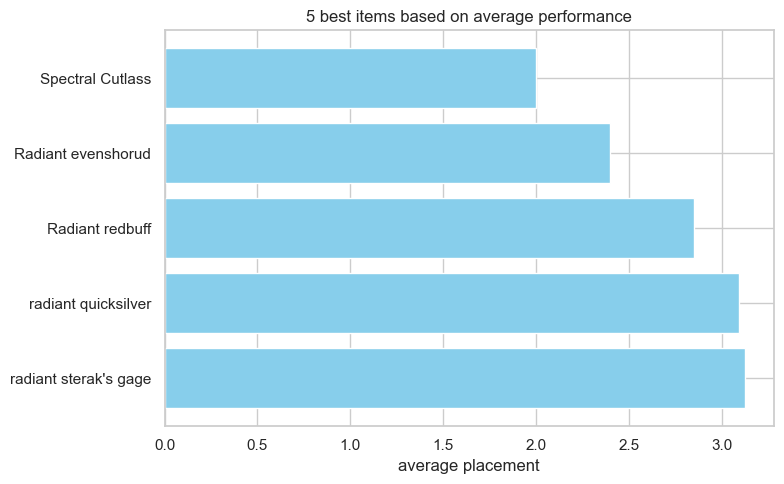

In [185]:

top5 = placement_df.sort_values(by='placement').head(5)
names =["Spectral Cutlass", "Radiant evenshorud", "Radiant redbuff", "radiant quicksilver", "radiant sterak's gage"]


plt.figure(figsize=(8, 5))
plt.barh(names, top5['placement'], color='skyblue')
plt.xlabel('average placement')
plt.title('5 best items based on average performance')
plt.gca().invert_yaxis()  # Najlepszy na górze
plt.tight_layout()
plt.show()

In [186]:
import plotly.express as px

In [187]:
top5 = placement_df.sort_values(by='placement').head(5)

# Wykres
fig = px.bar(
    top5,
    x='placement',
    y='item_id',
    orientation='h',
    text='placement',
    color='placement',
    color_continuous_scale='Blues_r',
    title='5 best items based on performance'
)

fig.update_layout(
    xaxis_title="average placement",
    yaxis_title="",
    yaxis=dict(autorange='reversed')  # Najlepszy item na górze
)
fig.write_html("top5_plot.html")

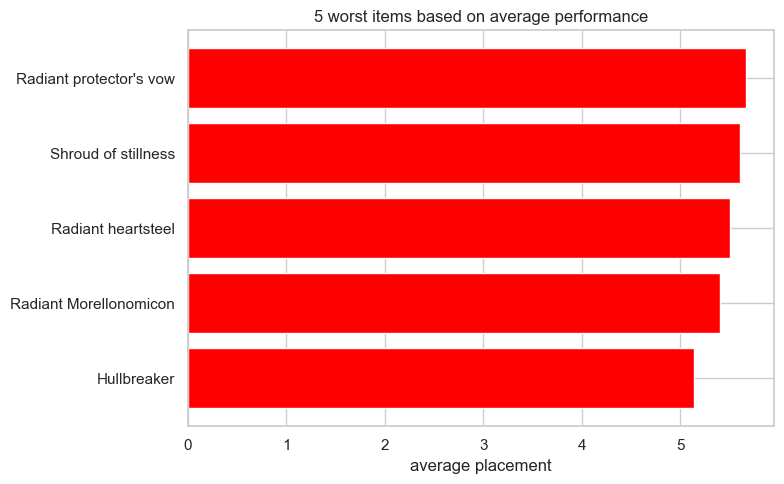

In [188]:
bop5 = placement_df.sort_values(by='placement', ascending = False).head(5)
names =["Radiant protector's vow", 'Shroud of stillness', 'Radiant heartsteel','Radiant Morellonomicon', 'Hullbreaker']


plt.figure(figsize=(8, 5))
plt.barh(names, bop5['placement'], color='red')
plt.xlabel('average placement')
plt.title('5 worst items based on average performance')
plt.gca().invert_yaxis()  # Najlepszy na górze
plt.tight_layout()
plt.show()

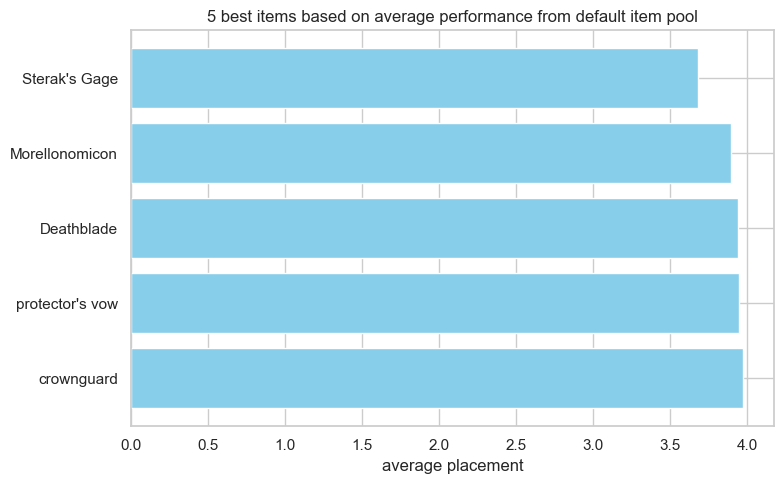

In [189]:
top5_default = placement_df[placement_df["item_pool"] == 'default'].sort_values(by='placement').head(5)
names = ["Sterak's Gage", "Morellonomicon","Deathblade", "protector's vow","crownguard"]


plt.figure(figsize=(8, 5))
plt.barh(names, top5_default['placement'], color='skyblue')
plt.xlabel('average placement')
plt.title('5 best items based on average performance from default item pool')
plt.gca().invert_yaxis()  # Najlepszy na górze
plt.tight_layout()
plt.show()

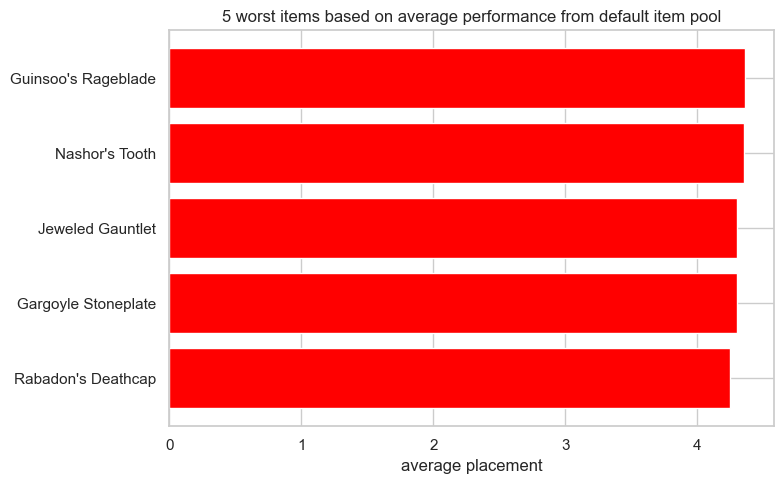

In [190]:
bop5_default = placement_df[placement_df["item_pool"] == 'default'].sort_values(by='placement', ascending= False).head(5)
names = ["Guinsoo's Rageblade", "Nashor's Tooth", "Jeweled Gauntlet","Gargoyle Stoneplate", "Rabadon's Deathcap"]


plt.figure(figsize=(8, 5))
plt.barh(names, bop5_default['placement'], color='red')
plt.xlabel('average placement')
plt.title('5 worst items based on average performance from default item pool')
plt.gca().invert_yaxis() 
plt.tight_layout()
plt.show()

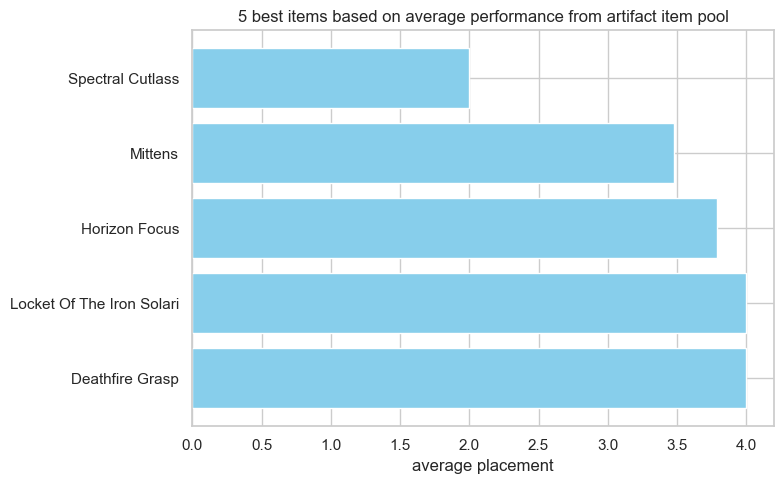

In [191]:
top5_artifact = placement_df[placement_df["item_pool"] == 'artifact'].sort_values(by='placement').head(5)
names = ["Spectral Cutlass","Mittens","Horizon Focus","Locket Of The Iron Solari", "Deathfire Grasp"]


plt.figure(figsize=(8, 5))
plt.barh(names, top5_artifact['placement'], color='skyblue')
plt.xlabel('average placement')
plt.title('5 best items based on average performance from artifact item pool')
plt.gca().invert_yaxis()  # Najlepszy na górze
plt.tight_layout()
plt.show()

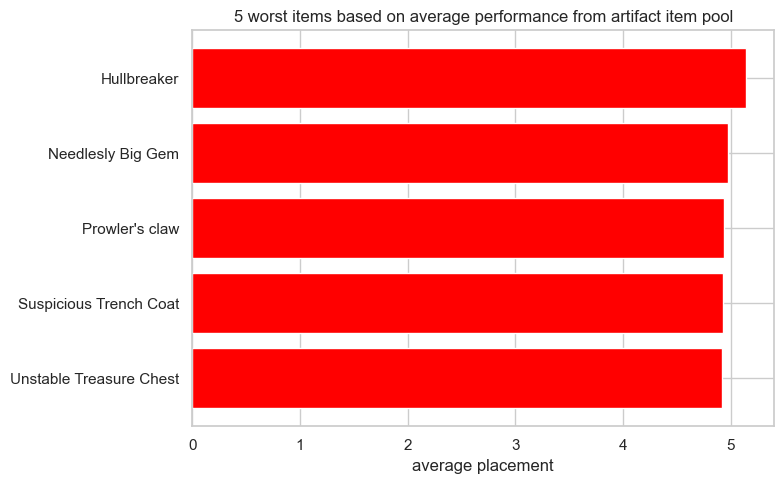

In [192]:
bop5_artifact = placement_df[placement_df["item_pool"] == 'artifact'].sort_values(by='placement', ascending=False).head(5)
names = ["Hullbreaker", "Needlesly Big Gem", "Prowler's claw", "Suspicious Trench Coat", "Unstable Treasure Chest"]


plt.figure(figsize=(8, 5))
plt.barh(names, bop5_artifact['placement'], color='red')
plt.xlabel('average placement')
plt.title('5 worst items based on average performance from artifact item pool')
plt.gca().invert_yaxis()  # Najlepszy na górze
plt.tight_layout()
plt.show()

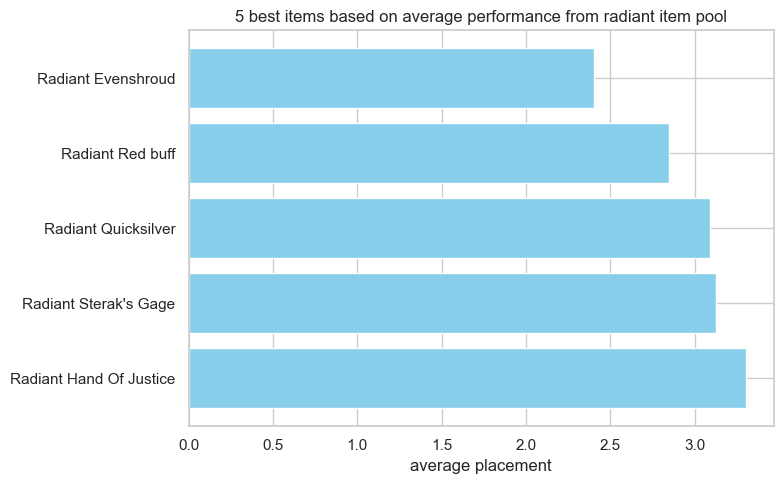

In [193]:
top5_radiant = placement_df[placement_df["item_pool"] == 'radiant'].sort_values(by='placement').head(5)
names = ["Radiant Evenshroud", "Radiant Red buff","Radiant Quicksilver","Radiant Sterak's Gage","Radiant Hand Of Justice"]


plt.figure(figsize=(8, 5))
plt.barh(names, top5_radiant['placement'], color='skyblue')
plt.xlabel('average placement')
plt.title('5 best items based on average performance from radiant item pool')
plt.gca().invert_yaxis()  # Najlepszy na górze
plt.tight_layout()
plt.show()

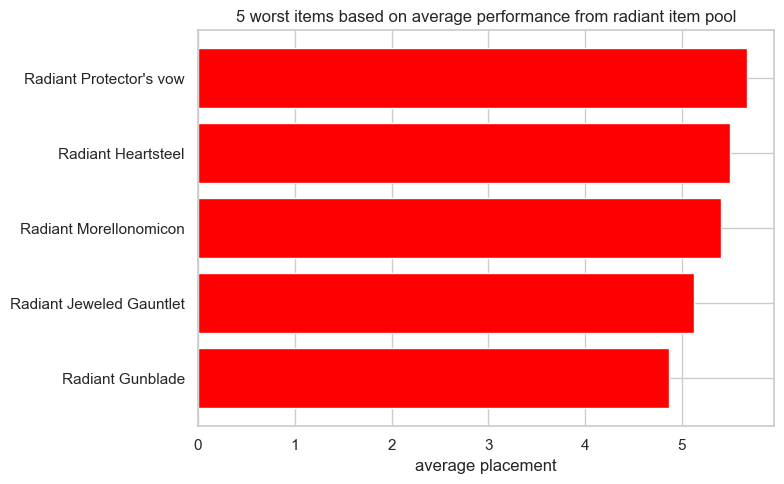

In [194]:
bop5_radiant = placement_df[placement_df["item_pool"] == 'radiant'].sort_values(by='placement', ascending=False).head(5)
names = ["Radiant Protector's vow", "Radiant Heartsteel", "Radiant Morellonomicon", "Radiant Jeweled Gauntlet", "Radiant Gunblade"]


plt.figure(figsize=(8, 5))
plt.barh(names, bop5_radiant['placement'], color='red')
plt.xlabel('average placement')
plt.title('5 worst items based on average performance from radiant item pool')
plt.gca().invert_yaxis()  # Najlepszy na górze
plt.tight_layout()
plt.show()

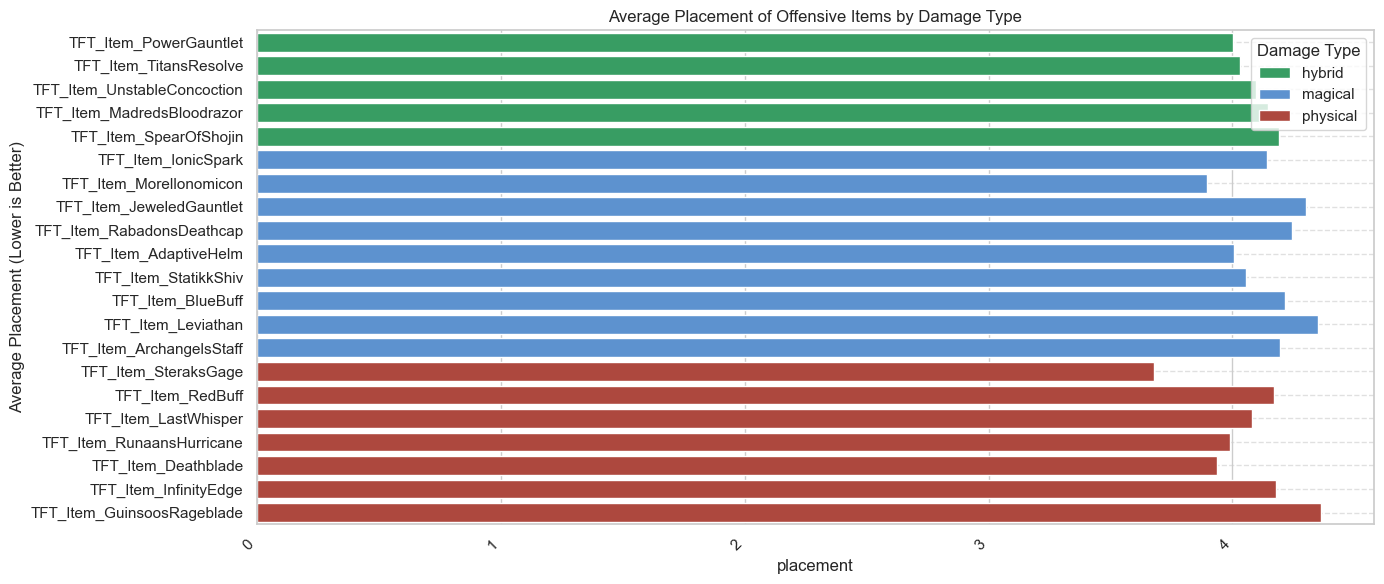

In [195]:
default_offensive = placement_df[
    (placement_df["item_pool"] == "default") &
    (placement_df["type"] == "offensive")
]

# Group by item and damage type, then compute mean placement
avg_placement = default_offensive.groupby(["item_id", "damage"])["placement"].mean().reset_index()

# Sort by placement for visual clarity (optional)
avg_placement = avg_placement.sort_values(by="placement").sort_values(by="damage")

damage_colors = {
    'magical': '#4a90e2',  # pretty blue
    'physical': '#c0392b',  # bloody red
    'hybrid': '#27ae60',    # nature green
}

# Plot grouped bar chart
plt.figure(figsize=(14, 6))
sns.barplot(data=avg_placement, x="placement", y="item_id", hue="damage", dodge=False, palette=damage_colors)
plt.ylabel("Average Placement (Lower is Better)")
plt.title("Average Placement of Offensive Items by Damage Type")
plt.xticks(rotation=45, ha='right')
plt.legend(title="Damage Type")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()



In [196]:
item_recom = db.query("SELECT items.match_id, items.puuid, items.item_id, items.character_id,placement FROM items join players on items.puuid = players.puuid join matches on matches.match_id = items.match_id WHERE matches.tft_set_number = 14")
item_recom_df = pd.DataFrame(item_recom, columns=['match_id', 'puuid', 'item_id', 'character_id', "placement"])

In [197]:
recommended_items = (
    item_recom_df
    .groupby(["character_id", "item_id"])
    .agg(
        avg_placement=("placement", "mean"),
        sample_count=("placement", "count")
    )
    .reset_index()
)
recommended_items = recommended_items[recommended_items["sample_count"] >= 10]
recommended_items_df =recommended_items.merge(unique_items,on="item_id",how="left")
recommended_items_df.head()

,character_id,item_id,avg_placement,sample_count,item_pool,type,damage
0,TFT14_Alistar,TFT_Item_BrambleVest,4.714286,21,default,defensive,NaN
1,TFT14_Alistar,TFT_Item_DragonsClaw,4.826087,23,default,defensive,NaN
2,TFT14_Alistar,TFT_Item_GargoyleStoneplate,4.218750,32,default,defensive,NaN
3,TFT14_Alistar,TFT_Item_RedBuff,4.333333,30,default,offensive,physical
4,TFT14_Alistar,TFT_Item_Redemption,3.947368,19,default,defensive,NaN


In [198]:
def find_best_items (character_id, item_pool):
    top3 = recommended_items_df[recommended_items_df["character_id"] == character_id][recommended_items_df["item_pool"] == item_pool].sort_values(by= "avg_placement", ascending= True).head(3)
    return top3
find_best_items("TFT14_Aphelios", "default").head()



C:\Users\48733\AppData\Local\Temp\ipykernel_21784\1760167718.py:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



,character_id,item_id,avg_placement,sample_count,item_pool,type,damage
18,TFT14_Aphelios,TFT_Item_Deathblade,3.500000,24,default,offensive,physical
20,TFT14_Aphelios,TFT_Item_HextechGunblade,3.619718,71,default,utility,hybrid
27,TFT14_Aphelios,TFT_Item_RunaansHurricane,3.645161,93,default,offensive,physical


In [199]:
find_best_items('TFT14_Brand', "default").head()

C:\Users\48733\AppData\Local\Temp\ipykernel_21784\1760167718.py:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



,character_id,item_id,avg_placement,sample_count,item_pool,type,damage
60,TFT14_Brand,TFT_Item_StatikkShiv,3.235294,17,default,offensive,magical
49,TFT14_Brand,TFT_Item_BlueBuff,3.483871,31,default,offensive,magical
54,TFT14_Brand,TFT_Item_Morellonomicon,3.736842,19,default,offensive,magical


In [200]:
def find_most_used_items (character_id, item_pool):
    top3 = recommended_items_df[recommended_items_df["character_id"] == character_id][recommended_items_df["item_pool"] == item_pool].sort_values(by= "sample_count", ascending= False).head(3)
    return top3
find_most_used_items("TFT14_Aphelios", "default").head()

C:\Users\48733\AppData\Local\Temp\ipykernel_21784\414560791.py:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



,character_id,item_id,avg_placement,sample_count,item_pool,type,damage
19,TFT14_Aphelios,TFT_Item_GuinsoosRageblade,4.172161,273,default,offensive,physical
21,TFT14_Aphelios,TFT_Item_InfinityEdge,4.238095,126,default,offensive,physical
27,TFT14_Aphelios,TFT_Item_RunaansHurricane,3.645161,93,default,offensive,physical


In [201]:
find_most_used_items("TFT14_Brand", "default").head()

C:\Users\48733\AppData\Local\Temp\ipykernel_21784\414560791.py:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



,character_id,item_id,avg_placement,sample_count,item_pool,type,damage
59,TFT14_Brand,TFT_Item_SpearOfShojin,4.197531,243,default,offensive,hybrid
51,TFT14_Brand,TFT_Item_JeweledGauntlet,4.137255,204,default,offensive,magical
56,TFT14_Brand,TFT_Item_PowerGauntlet,4.226415,106,default,offensive,hybrid


In [202]:
# Step 1: Count how many items each player had in a match
items_per_player = (
    item_recom_df
    .groupby(["match_id", "puuid"])
    .agg(
        num_items=("item_id", "count"),
        placement=("placement", "first")  # all rows for a player in one match have same placement
    )
    .reset_index()
)

# Step 2: Group by number of items and calculate average placement
placement_by_item_count = (
    items_per_player
    .groupby("num_items")["placement"]
    .mean()
    .reset_index()
)

C:\Users\48733\AppData\Local\Temp\ipykernel_21784\4005548512.py:17: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



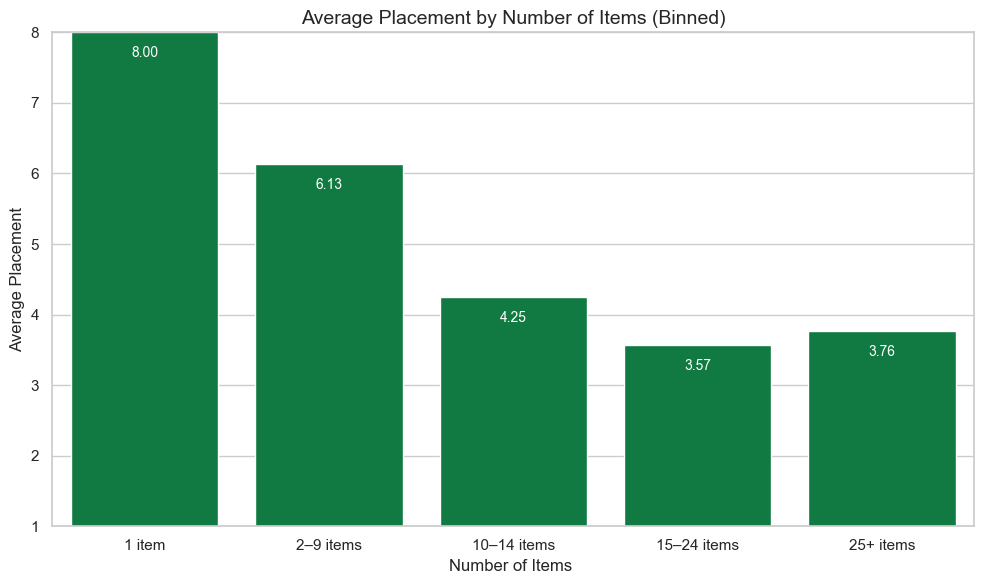

In [203]:
# 1. Create bins and labels
bins = [0, 1, 9, 14, 24, 99]  # edges: (0–1], (1–9], (9–14], etc.
labels = ["1 item", "2–9 items", "10–14 items", "15–24 items", "25+ items"]

# 2. Bin the data
items_per_player["item_group"] = pd.cut(
    items_per_player["num_items"],
    bins=bins,
    labels=labels,
    right=True,
    include_lowest=True
)

# 3. Calculate average placement per group
grouped = (
    items_per_player
    .groupby("item_group")
    .agg(
        avg_placement=("placement", "mean"),
        sample_size=("placement", "count")
    )
    .reset_index()
)

# 4. Plot bar chart
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(
    data=grouped,
    x="item_group",
    y="avg_placement",
    color="#008b41"
)

# 5. Annotate bars
for i, row in grouped.iterrows():
    plt.text(i, row["avg_placement"] - 0.2, f"{row['avg_placement']:.2f}", 
             ha='center', va='top', fontsize=10, color='white')

plt.title("Average Placement by Number of Items (Binned)", fontsize=14)
plt.xlabel("Number of Items ")
plt.ylabel("Average Placement")
plt.ylim(1, 8)  # TFT style
plt.tight_layout()
plt.show()

In [204]:
items_usage = (
    item_recom_df
    .groupby(["item_id"])
    .agg(
        item_count=("item_id", "count")
    )
    .reset_index()
)

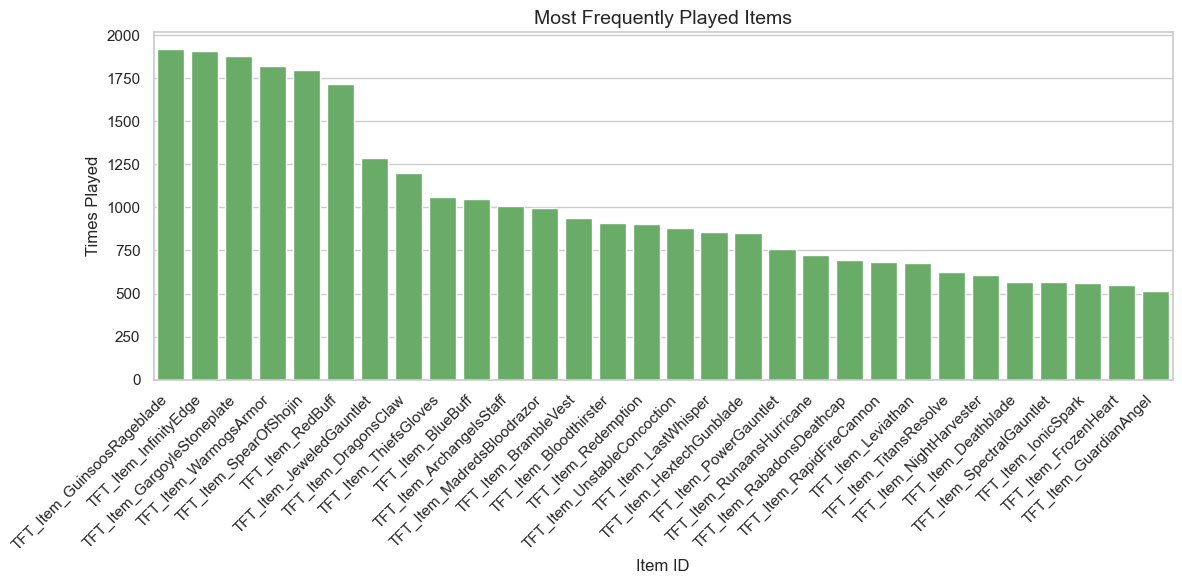

In [165]:
sns.set(style="whitegrid")

# Sort by count and select top N if it's too many
top_items = items_usage.sort_values(by="item_count", ascending=False).head(30)  # adjust as needed

plt.figure(figsize=(12, 6))
sns.barplot(
    data=top_items,
    x="item_id",  # or "item_name" if available
    y="item_count",
    color="#5cb85c"
)

plt.title("Most Frequently Played Items", fontsize=14)
plt.xlabel("Item ID" if "item_name" not in items_usage.columns else "Item Name")
plt.ylabel("Times Played")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

